# NumPy Basics: Arrays and Vectorized Computation

NumPy（Numerical Python的简称）是Python数值计算最重要的基础包。大多数提供科学计算的包都是用NumPy的数组作为构建基础。

NumPy之于数值计算特别重要的原因之一，是因为它可以高效处理大数组的数据。这是因为：一方面，NumPy是在一个连续的内存块中存储数据，独立于其他Python内置对象。NumPy的C语言编写的算法库可以操作内存，而不必进行类型检查或其它前期工作。比起Python的内置序列，NumPy数组使用的内存更少；而另一方面，NumPy可以在整个数组上执行复杂的计算，而不需要Python的for循环。

要搞明白具体的性能差距，考察一个包含一百万整数的数组，和一个等价的Python列表：

In [2]:
import numpy as np
my_arr = np.arange(1000000)
my_list = list(range(1000000))

各序列分别乘以2：

In [3]:
%time for _ in range(10): my_arr2 = my_arr * 2
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

Wall time: 29.9 ms
Wall time: 1.1 s


说明基于NumPy的算法比纯Python要快得多。

## The NumPy ndarray: A Multidimensional Array Object

NumPy最重要的一个特点就是N维数组对象（即ndarray）。

要明白这里如何利用与标量值类似的语法进行批次计算，先引入NumPy，然后生成一个包含随机数据的小数组：

In [4]:
import numpy as np
# Generate some random data
data = np.random.randn(2, 3)
data

array([[-0.2047,  0.4789, -0.5194],
       [-0.5557,  1.9658,  1.3934]])

再进行数学运算：

In [5]:
data * 10
#每个元素都乘以10
data + data
#每个元素都与自身相加

array([[-0.4094,  0.9579, -1.0389],
       [-1.1115,  3.9316,  2.7868]])

除了使用标准的NumPy惯用法impoort numpy as np，也可以在代码中使用from numpy import*。numpy的命名空间很大，包含许多函数，其中一些与Python的内置函数重名，如max和min。

ndarray是一个通用的同构数据多维容器，也就是说，其中的所有元素必须是相同类型的。每个数组都有一个shape（一个表示各维度大小的元组）和一个dtype（一个用于说明数组数据类型的对象）：

In [8]:
data.shape

(2, 3)

In [9]:
data.dtype

dtype('float64')

当本书中看到“数组”、“NumPy数组”、"ndarray"时，基本上都指的是同一样东西，即ndarray对象。

### Creating ndarrays

创建数组最简单的办法就是使用array函数。它接受一切序列型的对象（包括其他数组），然后产生一个新的含有传⼊数据的NumPy数组。以一个列表的转换为例：

In [10]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

嵌套序列（⽐如由⼀组等⻓列表组成的列表）将会被转换为一个多维数组：

In [11]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

因为data2是列表的列表，NumPy数组arr2的两个维度的shape是从data2引⼊的。可以用属性ndim和shape验证：

In [15]:
arr2.ndim

2

In [16]:
arr2.shape

(2, 4)

除非特别说明（稍后将会详细介绍），np.array会尝试为新建的这个数组推断出一个较为合适的数据类型。数据类型保存在一个特殊的dtype对象中。⽐如说，在上面的两个例子中，我们有：

In [17]:
arr1.dtype

dtype('float64')

In [19]:
arr2.dtype

dtype('int32')

除np.array之外，还有一些函数也可以新建数组。⽐如，zeros和ones分别可以创建指定长度或形状的全0或全1数组。empty可以创建一个没有任何具体值的数组。要用这些方法创建多维数组， 只需传入一个表示形状的元组即可：

In [21]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [22]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [23]:
np.empty((2, 3, 2))

array([[[8.4275e-312, 2.8162e-322],
        [0.0000e+000, 0.0000e+000],
        [1.5832e-296, 8.6095e-072]],

       [[5.2751e-091, 8.2359e-067],
        [1.2839e+160, 7.2734e-043],
        [6.4822e+170, 4.9343e+257]]])

认为np.empty会返回全0数组的想法是不安全的。很多情况下（如前所示），它返回的都是一些未初始化的垃圾值。

arange是Python内置函数range的数组版：

In [24]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

教材P120列出了一些数组创建函数。由于Numpy关注的是数值计算，因此若无特别指定，数据类型基本都是float64（浮点型）。

### Data Types for ndarrays

dtype（数据类型）是一个特殊的对象，它含有ndarray将一块内存解释为特定数据类型所需的信息：

In [26]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
arr1.dtype

dtype('float64')

In [27]:
arr2.dtype

dtype('int32')

通常只需要知道你所处理的数据的大致类型是浮点数、复数、整数、布尔值、字符串，还是普通的Python对象即可。当你需要控制数据在内存和磁盘中的存储方式时（尤其是对大数据集），那就得了解如何控制存储类型。并不需强记这些Numpy的dtype。

你可以通过ndarray的astype方法明确地将一个数组从一个dtype 转换成另一个dtype：

In [28]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

在本例中，整数被转换成了浮点数。如果将浮点数转换成整数，则⼩数部分将会被截取删除：

In [29]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr

array([ 3, -1, -2,  0, 12, 10])

In [30]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10])

如果某字符串数组表示的全是数字，也可以用astype将其转换为数值形式：

In [31]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

注意：使用numpy.string_类型时，一定要小心，因为NumPy的字符串数据是大小固定的，发生截取时，不会发出警告。pandas提供了更多非数值数据的便利的处理方法。如果转换过程因为某种原因而失败了（⽐如某个不能被转换为 float64的字符串），就会引发⼀个ValueError。这里，写的是float而不是np.float64；NumPy会将 Python类型映射到等价的dtype上。

数组的dtype还有另一个属性：

In [32]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

还可以用简洁的类型代码来表示dtype：

In [33]:
empty_uint32 = np.empty(8, dtype='u4')
empty_uint32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

笔记：调用astype总会创建一个新的数组（一个数据的备份），即使新的dtype与旧的dtype相同。

### Arithmetic with NumPy Arrays

数组不用编写循环即可对数据执行批量运算，NumPy用户称其为矢量化（vectorization）。大小相等的数组之间的任何算术运算都将运算应用到元素级：

In [34]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [35]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [36]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

 数组与标量的算术运算会将标量值传播到各个元素：

In [39]:
1 / arr

array([[1.    , 0.5   , 0.3333],
       [0.25  , 0.2   , 0.1667]])

In [38]:
arr ** 0.5

array([[1.    , 1.4142, 1.7321],
       [2.    , 2.2361, 2.4495]])

In [40]:
arr ** 0.5

array([[1.    , 1.4142, 1.7321],
       [2.    , 2.2361, 2.4495]])

大小相同的数组之间的⽐较会生成布尔值数组：

In [41]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [42]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

### Basic Indexing and Slicing

NumPy数组的索引是一个内容丰富的主题，因为选取数据子集或单个元素的方式有很多。一维数组很简单。从表面上看，它们跟Python列表的功能差不多：

In [44]:
arr = np.arange(10)

arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [45]:
arr[5]

5

In [46]:
arr[5:8]

array([5, 6, 7])

In [47]:
arr[5:8] = 12

In [48]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

如上所示，当你将一个标量值赋值给⼀个切片时（如 arr[5:8]=12），该值会自动传播（也就说后面将会讲到的“广播”）到整个选区。跟列表最重要的区别在于，数组切片是原始数组的视图。这意味着数据不会被复制，视图上的任何修改都会直接反映到源数组上。

作为例子，先创建一个arr切片：

In [49]:
arr_slice = arr[5:8]

arr_slice

array([12, 12, 12])

当修改arr_slice的值，变动也会体现在原始数组arr中：

In [50]:
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

切片[:]会给数组中的所有值赋值：

In [51]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

注意：如果你想要得到的是ndarray切⽚的⼀份副本而非视图，就需要明确地进行复制操作，例如arr[5:8].copy()。

对于高维度数组，能做的事情更多。在一个二维数组中，各索引位置上的元素不再是标量而是一维数组：

In [52]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

因此，可以对各个元素进行递归访问，但这样需要做的事情有点多。你可以传⼊一个以逗号隔开的索引列表来选取单个元素。也就是说，下面两种方式是等价的：

In [53]:
arr2d[0][2]

3

In [54]:
arr2d[0, 2]

3

在多维数组中，如果省略了后面的索引，则返回对象会是一个维度低一点的ndarray（它含有高一级维度上的所有数据）。因此，在2×2×3数组arr3d中：

In [55]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [56]:
arr3d[0]
#是一个2×3数组

array([[1, 2, 3],
       [4, 5, 6]])

In [57]:
#标量值和数组都可以被赋值给arr3d[0]
old_values = arr3d[0].copy()

arr3d[0] = 42

arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [58]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [59]:
#相似的，arr3d[1,0]可以访问索引以(1,0)开头的那些值（以一维数组的形式返回）
arr3d[1, 0]

array([7, 8, 9])

虽然是用两步进行索引的，表达式是相同的：

In [60]:
x = arr3d[1]
x

array([[ 7,  8,  9],
       [10, 11, 12]])

In [61]:
x[0]

array([7, 8, 9])

注意，在上面所有这些选取数组子集的例子中，返回的数组都是视图。

#### Indexing with slices

ndarray的切片语法跟Python列表这样的一维对象差不多：

In [62]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [63]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

对于之前的二维数组arr2d，其切片方式稍显不同：

In [66]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [67]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

可以看出，它是沿着第0轴（即第一个轴）切片的。也就是说， 切片是沿着一个轴向选取元素的。表达式arr2d[:2]可以被认为 是“选取arr2d的前两⾏”。
你可以一次传⼊多个切⽚，就像传⼊多个索引那样：

In [68]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

像这样进行切片时，只能得到相同维数的数组视图。通过将整数索引和切片混合，可以得到低维度的切⽚。

例如，可以选取第二行的前两列：

In [69]:
arr2d[1, :2]

array([4, 5])

In [70]:
arr2d[:2, 2]
#相似的选第三列前两行

array([3, 6])

In [71]:
arr2d[:, :1]
#只有冒号表示选取整个轴，像这样可以只对高维轴进行切片

array([[1],
       [4],
       [7]])

In [72]:
#对切片表达式的赋值操作也会被扩散到整个选区
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### Boolean Indexing

假设有一个用于存储数据的数组以及一个存储姓名的数组（含有重复项）。在这里使用numpy.random中的randn函数生成一些正态分布的随机数据：

In [73]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)

names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [74]:
data

array([[ 0.0929,  0.2817,  0.769 ,  1.2464],
       [ 1.0072, -1.2962,  0.275 ,  0.2289],
       [ 1.3529,  0.8864, -2.0016, -0.3718],
       [ 1.669 , -0.4386, -0.5397,  0.477 ],
       [ 3.2489, -1.0212, -0.5771,  0.1241],
       [ 0.3026,  0.5238,  0.0009,  1.3438],
       [-0.7135, -0.8312, -2.3702, -1.8608]])

假设每个名字都对应data数组中的一行，而我们想要选出对应于名字"Bob"的所有行。跟算术运算⼀样，数组的⽐较运算（如 ==）也是⽮量化的。因此，对names和字符串"Bob"的⽐较运算将会产生⼀个布尔型数组：

In [75]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [76]:
#该布尔型数组可用于数据索引：
data[names == 'Bob']

array([[ 0.0929,  0.2817,  0.769 ,  1.2464],
       [ 1.669 , -0.4386, -0.5397,  0.477 ]])

布尔型数组的长度必须跟被索引的轴长度一致。注意：如果布尔型数组的长度不对，布尔型选择就会出错， 因此一定要⼩⼼。

In [77]:
data[names == 'Bob', 2:]
#选取names=='Bob'的行，并索引了列

array([[ 0.769 ,  1.2464],
       [-0.5397,  0.477 ]])

In [78]:
data[names == 'Bob', 3]

array([1.2464, 0.477 ])

要选择除"Bob"以外的其他值，既可以使用不等于符号（!=）， 也可以通过~对条件进行否定：

In [79]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [80]:
data[~(names == 'Bob')]

array([[ 1.0072, -1.2962,  0.275 ,  0.2289],
       [ 1.3529,  0.8864, -2.0016, -0.3718],
       [ 3.2489, -1.0212, -0.5771,  0.1241],
       [ 0.3026,  0.5238,  0.0009,  1.3438],
       [-0.7135, -0.8312, -2.3702, -1.8608]])

In [81]:
#~操作符用来反转条件很好用
cond = names == 'Bob'

data[~cond]

array([[ 1.0072, -1.2962,  0.275 ,  0.2289],
       [ 1.3529,  0.8864, -2.0016, -0.3718],
       [ 3.2489, -1.0212, -0.5771,  0.1241],
       [ 0.3026,  0.5238,  0.0009,  1.3438],
       [-0.7135, -0.8312, -2.3702, -1.8608]])

选取这三个名字中的两个需要组合应用多个布尔条件，使用 &（和）、|（或）之类的布尔算术运算符即可：

In [82]:
mask = (names == 'Bob') | (names == 'Will')

mask

array([ True, False,  True,  True,  True, False, False])

In [83]:
data[mask]

array([[ 0.0929,  0.2817,  0.769 ,  1.2464],
       [ 1.3529,  0.8864, -2.0016, -0.3718],
       [ 1.669 , -0.4386, -0.5397,  0.477 ],
       [ 3.2489, -1.0212, -0.5771,  0.1241]])

通过布尔型索引选取数组中的数据，将总是创建数据的副本，即使返回一模一样的数组也是如此。

注意：要是用&与|，Python关键字and和or在布尔型数组中无效。

通过布尔型数组设置值是⼀种经常用到的⼿段。为了将data中的所有负值都设置为0，我们只需：

In [84]:
data[data < 0] = 0
data

array([[0.0929, 0.2817, 0.769 , 1.2464],
       [1.0072, 0.    , 0.275 , 0.2289],
       [1.3529, 0.8864, 0.    , 0.    ],
       [1.669 , 0.    , 0.    , 0.477 ],
       [3.2489, 0.    , 0.    , 0.1241],
       [0.3026, 0.5238, 0.0009, 1.3438],
       [0.    , 0.    , 0.    , 0.    ]])

In [85]:
#也可通过一维布尔数组设置行或列的值
data[names != 'Joe'] = 7
data

array([[7.    , 7.    , 7.    , 7.    ],
       [1.0072, 0.    , 0.275 , 0.2289],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [0.3026, 0.5238, 0.0009, 1.3438],
       [0.    , 0.    , 0.    , 0.    ]])

### Fancy Indexing

花式索引（Fancy indexing）是⼀个NumPy术语，它指的是利用整数数组进行索引。

假设我们有⼀个8×4数组：

In [86]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

为了以特定顺序选取⾏子集，只需传⼊⼀个用于指定顺序的整数列表或ndarray即可：

In [87]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

使用负数索引将会从末尾开始选取行：

In [88]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

一次传⼊多个索引数组会有一点特别。它返回的是一个一维数组，其中的元素对应各个索引元组：

In [89]:
arr = np.arange(32).reshape((8, 4))

arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [90]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

最终选出的是元素(1,0)、(5,3)、(7,1)和(2,2)。⽆论数组是多少维的，花式索引总是一维的。

这个花式索引的⾏为可能会跟某些用户的预期不一样，选取矩阵的⾏列子集应该是矩形区域的形式才对。下面是得到该结果的一个办法：

In [91]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

花式索引和切片不一样，它总是将数据复制到新数组中。

### Transposing Arrays and Swapping Axes

转置是重塑的一种特殊形式，它返回的是源数据的视图（不会进⾏任何复制操作）。数组不仅有transpose⽅法，还有⼀个特殊的T属性：

In [92]:
arr = np.arange(15).reshape((3, 5))

arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [93]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

在进行矩阵计算时经常用到该操作。

In [94]:
#用np.dot计算矩阵内积
arr = np.random.randn(6, 3)

arr

array([[-0.8608,  0.5601, -1.2659],
       [ 0.1198, -1.0635,  0.3329],
       [-2.3594, -0.1995, -1.542 ],
       [-0.9707, -1.307 ,  0.2863],
       [ 0.378 , -0.7539,  0.3313],
       [ 1.3497,  0.0699,  0.2467]])

In [95]:
np.dot(arr.T, arr)

array([[ 9.2291,  0.9394,  4.948 ],
       [ 0.9394,  3.7662, -1.3622],
       [ 4.948 , -1.3622,  4.3437]])

对于高维数组，transpose需要得到一个由轴编号组成的元组才能对这些轴进⾏转置（⽐较费脑子）：

In [96]:
arr = np.arange(16).reshape((2, 2, 4))

arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [97]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

这里，第一个轴被换成了第二个，第二个轴被换成了第一个，最后一个轴不变。

简单的转置可以使⽤.T，它其实就是进行轴对换而已。ndarray还有一个swapaxes方法，它需要接受一对轴编号：

In [98]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [99]:
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

swapaxes也是返回源数据的视图（不会进行任何复制操作）。

## Universal Functions: Fast Element-Wise Array Functions

通用函数（即ufunc）是一种对ndarray中的数据执行元素级运算的函数。你可以将其看做简单函数（接受一个或多个标量值，并产生一个或多个标量值）的矢量化包装器。

许多ufunc都是简单的元素级变体，如sqrt和exp：

In [100]:
arr = np.arange(10)

arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [101]:
np.sqrt(arr)

array([0.    , 1.    , 1.4142, 1.7321, 2.    , 2.2361, 2.4495, 2.6458,
       2.8284, 3.    ])

In [102]:
np.exp(arr)

array([   1.    ,    2.7183,    7.3891,   20.0855,   54.5982,  148.4132,
        403.4288, 1096.6332, 2980.958 , 8103.0839])

这些都是一元（unary）ufunc。另外一些（如add或maximum） 接受2个数组（因此也叫二元（binary）ufunc），并返回一个结果数组：

In [103]:
x = np.random.randn(8)
y = np.random.randn(8)
x

array([-0.0119,  1.0048,  1.3272, -0.9193, -1.5491,  0.0222,  0.7584,
       -0.6605])

In [104]:
y

array([ 0.8626, -0.01  ,  0.05  ,  0.6702,  0.853 , -0.9559, -0.0235,
       -2.3042])

In [105]:
np.maximum(x, y)

array([ 0.8626,  1.0048,  1.3272,  0.6702,  0.853 ,  0.0222,  0.7584,
       -0.6605])

这里，numpy.maximum计算了x和y中元素级别最大的元素。虽然并不常见，但有些ufunc的确可以返回多个数组。modf就是一个例子，它是Python内置函数divmod的矢量化版本，它会返回浮点数数组的⼩数和整数部分：

In [106]:
arr = np.random.randn(7) * 5

arr

array([-3.2623, -6.0915, -6.663 ,  5.3731,  3.6182,  3.45  ,  5.0077])

In [107]:
remainder, whole_part = np.modf(arr)

remainder

array([-0.2623, -0.0915, -0.663 ,  0.3731,  0.6182,  0.45  ,  0.0077])

In [108]:
whole_part

array([-3., -6., -6.,  5.,  3.,  3.,  5.])

Ufuncs接受out选项参数，可以让它们在数组的原地进行操作：

In [109]:
arr

array([-3.2623, -6.0915, -6.663 ,  5.3731,  3.6182,  3.45  ,  5.0077])

In [110]:
np.sqrt(arr)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([   nan,    nan,    nan, 2.318 , 1.9022, 1.8574, 2.2378])

In [111]:
np.sqrt(arr, arr)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([   nan,    nan,    nan, 2.318 , 1.9022, 1.8574, 2.2378])

In [112]:
arr

array([   nan,    nan,    nan, 2.318 , 1.9022, 1.8574, 2.2378])

## Array-Oriented Programming with Arrays

NumPy数组使你可以将许多种数据处理任务表述为简洁的数组表达式（否则需要编写循环）。用数组表达式代替循环的做法，通常被称为矢量化。一般来说，矢量化数组运算要⽐等价的纯Python方式快上一两个数量级（甚至更多），尤其是各种数值计算。

作为简单的例子，假设我们想要在一组值（网格型）上计算函数sqrt(x^2+y^2)。np.meshgrid函数接受两个一维数组，并产生两个二维矩阵（对应于两个数组中所有的(x,y)对）：

In [113]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

现在，对该函数的求值运算就好办了，把这两个数组当做两个浮点数那样编写表达式即可：

In [114]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.0711, 7.064 , 7.0569, ..., 7.0499, 7.0569, 7.064 ],
       [7.064 , 7.0569, 7.0499, ..., 7.0428, 7.0499, 7.0569],
       [7.0569, 7.0499, 7.0428, ..., 7.0357, 7.0428, 7.0499],
       ...,
       [7.0499, 7.0428, 7.0357, ..., 7.0286, 7.0357, 7.0428],
       [7.0569, 7.0499, 7.0428, ..., 7.0357, 7.0428, 7.0499],
       [7.064 , 7.0569, 7.0499, ..., 7.0428, 7.0499, 7.0569]])

作为第9章的先导，用matplotlib创建了这个二维数组的可视化：

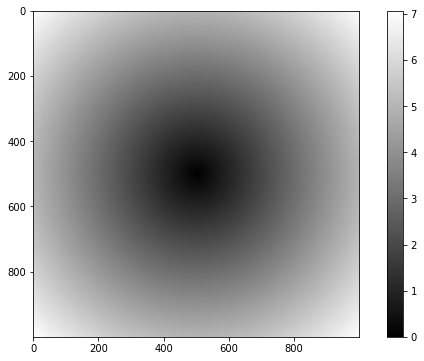

In [115]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
#用matplotlib的imshow函数创建

In [118]:
plt.close('all')

### Expressing Conditional Logic as Array Operations

numpy.where函数是三元表达式x if condition else y的矢量化版本。假设我们有一个布尔数组和两个值数组：

In [119]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

假设我们想要根据cond中的值选取xarr和yarr的值：当cond中的 值为True时，选取xarr的值，否则从yarr中选取。列表推导式的写法应该如下所示：

In [120]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

这有几个问题。第一，它对大数组的处理速度不是很快（因为所有工作都是由纯Python完成的）。第二，⽆法用于多维数组。若使用np.where，则可以将该功能写得非常简洁：

In [121]:
result = np.where(cond, xarr, yarr)

result

array([1.1, 2.2, 1.3, 1.4, 2.5])

np.where的第二个和第三个参数不必是数组，它们都可以是标量值。在数据分析工作中，where通常用于根据另一个数组而产生一个新的数组。假设有一个由随机数据组成的矩阵，你希望将所有正值替换为2，将所有负值替换为－2。若利用np.where，则会非常简单：

In [122]:
arr = np.random.randn(4, 4)

arr

array([[-0.5031, -0.6223, -0.9212, -0.7262],
       [ 0.2229,  0.0513, -1.1577,  0.8167],
       [ 0.4336,  1.0107,  1.8249, -0.9975],
       [ 0.8506, -0.1316,  0.9124,  0.1882]])

In [123]:
arr > 0

array([[False, False, False, False],
       [ True,  True, False,  True],
       [ True,  True,  True, False],
       [ True, False,  True,  True]])

In [124]:
np.where(arr > 0, 2, -2)

array([[-2, -2, -2, -2],
       [ 2,  2, -2,  2],
       [ 2,  2,  2, -2],
       [ 2, -2,  2,  2]])

使用np.where，可以将标量和数组结合起来。例如，我可用常数2替换arr中所有正的值：

In [125]:
np.where(arr > 0, 2, arr) # set only positive values to 2

array([[-0.5031, -0.6223, -0.9212, -0.7262],
       [ 2.    ,  2.    , -1.1577,  2.    ],
       [ 2.    ,  2.    ,  2.    , -0.9975],
       [ 2.    , -0.1316,  2.    ,  2.    ]])

传递给where的数组大小可以不相等，甚至可以是标量值。 

### Mathematical and Statistical Methods

可以通过数组上的一组数学函数对整个数组或某个轴向的数据进行统计计算。sum、mean以及标准差std等聚合计算 （aggregation，通常叫做约简（reduction））既可以当做数组的实例方法调用，也可以当做顶级NumPy函数使用。

这里，我生成了一些正态分布随机数据，然后做了聚类统计：


In [126]:
arr = np.random.randn(5, 4)

arr

array([[ 2.1695, -0.1149,  2.0037,  0.0296],
       [ 0.7953,  0.1181, -0.7485,  0.585 ],
       [ 0.1527, -1.5657, -0.5625, -0.0327],
       [-0.929 , -0.4826, -0.0363,  1.0954],
       [ 0.9809, -0.5895,  1.5817, -0.5287]])

In [127]:
arr.mean()

0.19607051119998253

In [128]:
np.mean(arr)

0.19607051119998253

In [129]:
arr.sum()

3.9214102239996507

mean和sum这类的函数可以接受一个axis选项参数，用于计算该轴向上的统计值，最终结果是一个少一维的数组：

In [130]:
arr.mean(axis=1)

array([ 1.022 ,  0.1875, -0.502 , -0.0881,  0.3611])

In [131]:
arr.sum(axis=0)

array([ 3.1693, -2.6345,  2.2381,  1.1486])

这里，arr.mean(1)是“计算行的平均值”，arr.sum(0)是“计算每列的和”。

其他如cumsum和cumprod之类的方法则不聚合，而是产生一个由中间结果组成的数组：

In [132]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

在多维数组中，累加函数（如cumsum）返回的是同样大⼩的数组，但是会根据每个低维的切片沿着标记轴计算部分聚类：

In [133]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [134]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

In [135]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

### Methods for Boolean Arrays

在上面这些方法中，布尔值会被强制转换为1（True）和 0（False）。因此，sum经常被用来对布尔型数组中的True值计数：

In [136]:
arr = np.random.randn(100)
(arr > 0).sum() # Number of positive values

42

另外还有两个方法any和all，它们对布尔型数组非常有用。any⽤ 于测试数组中是否存在一个或多个True，⽽all则检查数组中所有值是否都是True：

In [137]:
bools = np.array([False, False, True, False])
bools.any()

True

In [138]:
bools.all()

False

这两种方法也能用于非布尔型，所有非0元素会被当作True。

### Sorting

和Python内置的列表类型一样，Numpy数组也可通过sort方法就地排序：

In [139]:
arr = np.random.randn(6)
arr

array([ 0.6095, -0.4938,  1.24  , -0.1357,  1.43  , -0.8469])

In [140]:
arr.sort()
arr

array([-0.8469, -0.4938, -0.1357,  0.6095,  1.24  ,  1.43  ])

多维数组可以在任何一个轴向上进行排序，只需将轴编号传给sort即可：

In [141]:
arr = np.random.randn(5, 3)
arr

array([[ 0.6033,  1.2636, -0.2555],
       [-0.4457,  0.4684, -0.9616],
       [-1.8245,  0.6254,  1.0229],
       [ 1.1074,  0.0909, -0.3501],
       [ 0.218 , -0.8948, -1.7415]])

In [142]:
arr.sort(1)
arr

array([[-0.2555,  0.6033,  1.2636],
       [-0.9616, -0.4457,  0.4684],
       [-1.8245,  0.6254,  1.0229],
       [-0.3501,  0.0909,  1.1074],
       [-1.7415, -0.8948,  0.218 ]])

顶级方法np.sort返回的是数组的已排序副本，⽽就地排序则会修改数组本身。计算数组分位数最简单的办法是对其进行排序，然后选取特定位置的值：

In [143]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% quantile

-1.5311513550102103

### Unique and Other Set Logic

NumPy提供了一些针对一维ndarray的基本集合运算。最常用的可能要数np.unique了，它用于找出数组中的唯一值并返回已排序的结果：


In [144]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [145]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

与np.unique等价的纯Python代码对比：

In [146]:
sorted(set(names))

['Bob', 'Joe', 'Will']

另一个函数np.in1d用于测试一个数组中的值在另一个数组中的成员资格，返回一个布尔型数组：

In [147]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

## File Input and Output with Arrays

NumPy能够读写磁盘上的文本数据或二进制数据。这一⼩节只讨论NumPy的内置二进制格式，因为更多的用户会使用pandas或其它工具加载文本或表格数据（⻅第6章）。

np.save和np.load是读写磁盘数组数据的两个主要函数。默认情况下，数组是以未压缩的原始二进制格式保存在扩展名为.npy的⽂件中的：

In [148]:
arr = np.arange(10)
np.save('some_array', arr)

如果文件路径末尾没有扩展名.npy，则该扩展名会被自动加上。 然后就可以通过np.load读取磁盘上的数组：

In [149]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

通过np.savez可以将多个数组保存到一个未压缩⽂件中，将数组以关键字参数的形式传⼊即可：

In [150]:
np.savez('array_archive.npz', a=arr, b=arr)

加载.npz文件时，你会得到一个类似字典的对象，该对象会对各个数组进行延迟加载：

In [151]:
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [152]:
#如果数据压缩的很好，就可以使用numpy.savez_compressed：
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

## Linear Algebra

线性代数（如矩阵乘法、矩阵分解、⾏列式以及其他方阵数学等）是任何数组库的重要组成部分。不像某些语言（如 MATLAB），通过 * 对两个二维数组相乘得到的是一个元素级的积，⽽不是一个矩阵点积。因此，NumPy提供了一个用于矩阵乘法的dot函数（既是一个数组方法也是numpy命名空间中的一个函数）：

In [154]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [155]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [156]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [157]:
#x.dot(y)等价于np.dot(x,y)
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [158]:
#一个二维数组跟一个大⼩合适的一维数组的矩阵点积运算之后会得到一个一维数组：
np.dot(x, np.ones(3))

array([ 6., 15.])

@符（类似Python 3.5）也可以用作中缀运算符，进行矩阵乘法：

In [159]:
x @ np.ones(3)

array([ 6., 15.])

numpy.linalg中有一组标准的矩阵分解运算以及诸如求逆和行列式之类的东⻄。它们跟MATLAB和R等语言所使用的是相同的行业标准线性代数库，如BLAS、LAPACK、Intel MKL（Math Kernel Library，可能有，取决于你的NumPy版本）等：

In [161]:
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
mat = X.T.dot(X)
inv(mat)

array([[ 1.8252, -0.0526,  0.0322, -0.0812, -0.7931],
       [-0.0526,  0.2419,  0.0728, -0.0705,  0.0816],
       [ 0.0322,  0.0728,  0.1843, -0.1058,  0.0563],
       [-0.0812, -0.0705, -0.1058,  0.4604,  0.0917],
       [-0.7931,  0.0816,  0.0563,  0.0917,  0.6023]])

In [162]:
mat.dot(inv(mat))

array([[ 1.,  0., -0., -0.,  0.],
       [ 0.,  1.,  0., -0., -0.],
       [ 0., -0.,  1.,  0., -0.],
       [-0.,  0.,  0.,  1., -0.],
       [ 0., -0., -0., -0.,  1.]])

In [163]:
q, r = qr(mat)
r

array([[-2.8403,  0.7404,  5.467 ,  2.3955, -5.9585],
       [ 0.    , -5.1975,  3.3312, -0.3467,  0.5588],
       [ 0.    ,  0.    , -5.7454, -1.9003,  0.3677],
       [ 0.    ,  0.    ,  0.    , -2.1282,  0.3163],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.995 ]])

## Pseudorandom Number Generation

numpy.random模块对Python内置的random进行了补充，增加了 ⼀些用于⾼效生成多种概率分布的样本值的函数。例如，你可以用normal来得到一个标准正态分布的4×4样本数组：

In [164]:
samples = np.random.normal(size=(4, 4))
samples

array([[-0.006 ,  0.4901, -0.2772, -0.7072],
       [-0.5601,  2.7355,  0.9273,  1.5139],
       [ 0.5386,  1.2738,  0.6679, -0.9692],
       [ 1.6761, -0.8176,  0.0502,  1.9513]])

而Python内置的random模块则只能一次生成一个样本值。从下面的测试结果中可以看出，如果需要产生大量样本值， numpy.random快了不⽌一个数量级：

In [165]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.normal(size=N)

1.94 s ± 179 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
63.1 ms ± 10.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


我们说这些都是伪随机数，是因为它们都是通过算法基于随机数生成器种子，在确定性的条件下生成的。你可以用NumPy的np.random.seed更改随机数生成种子：

In [166]:
np.random.seed(1234)

numpy.random的数据生成函数使用了全局的随机种子。要避免全局状态，你可以使用numpy.random.RandomState，创建一个与其它隔离的随机数生成器：

In [167]:
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.4714, -1.191 ,  1.4327, -0.3127, -0.7206,  0.8872,  0.8596,
       -0.6365,  0.0157, -2.2427])

## Example: Random Walks

我们通过模拟随机漫步来说明如何运用数组运算。先来看一个简单的随机漫步的例⼦：从0开始，步⻓1和－1出现的概率相等。

下面是一个通过内置的random模块以纯Python的方式实现1000步的随机漫步：

In [168]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

In [169]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

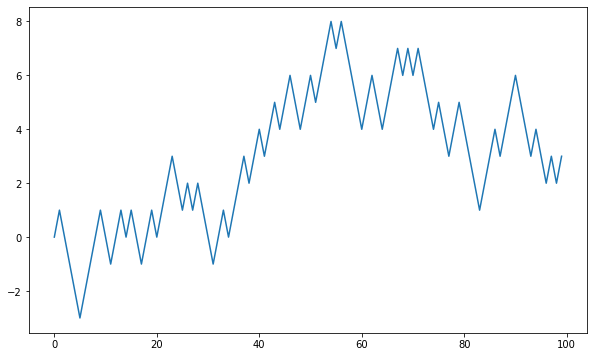

In [170]:
plt.plot(walk[:100])#根据前100个随机漫步值生成折线图

In [171]:
np.random.seed(12345)

不难看出，这其实就是随机漫步中各步的累计和，可以⽤一个数 组运算来实现。因此，用np.random模块一次性随机产生1000个“掷硬币”结果（即两个数中任选一个），将其分别设置为1或－ 1，然后计算累计和：

In [172]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

有了这些数据之后，我们就可以沿着漫步路径做一些统计工作了，⽐如求取最大值和最⼩值：

In [173]:
walk.min()

-3

In [174]:
walk.max()

31

现在来看一复杂点的统计任务——首次穿越时间，即随机漫步过程中第一次到达某个特定值的时间。假设我们想要知道本次随机漫步需要多久才能距离初始0点⾄少10步远（任一方向均可）。np.abs(walk)>=10可以得到一个布尔型数组，它表示的是距离是否达到或超过10，⽽我们想要知道的是第一个10或－10 的索引。可以用argmax来解决这个问题，它返回的是该布尔型数组第一个最⼤值的索引（True就是最大值）：

In [175]:
(np.abs(walk) >= 10).argmax()

37

注意，这里使用argmax并不是很高效，因为它无论如何都会对数组进行完全扫描。在本例中，只要发现了一个True，那我们就知道它是个最大值了。

### Simulating Many Random Walks at Once

如果你希望模拟多个随机漫步过程（⽐如5000个），只需对上面的代码做一点点修改即可生成所有的随机漫步过程。只要给 numpy.random的函数传⼊一个二元元组就可以产生一个二维数组，然后我们就可以一次性计算5000个随机漫步过程（一⾏一个）的累计和了：

In [176]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[  1,   0,   1, ...,   8,   7,   8],
       [  1,   0,  -1, ...,  34,  33,  32],
       [  1,   0,  -1, ...,   4,   5,   4],
       ...,
       [  1,   2,   1, ...,  24,  25,  26],
       [  1,   2,   3, ...,  14,  13,  14],
       [ -1,  -2,  -3, ..., -24, -23, -22]], dtype=int32)

In [177]:
walks.max()#计算所有随机漫步过程的最大值

138

In [178]:
walks.min()#计算所有随机漫步过程的最小值

-133

得到这些数据之后，我们来计算30或－30的最⼩穿越时间。这里稍微复杂些，因为不是5000个过程都到达了30。我们可以用any方法来对此进行检查：

In [179]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30
hits30.sum() # Number that hit 30 or -30

3410

然后我们利用这个布尔型数组选出那些穿越了30（绝对值）的随机漫步（行），并调用argmax在轴1上获取穿越时间：

In [180]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

498.8897360703812

In [181]:
#normal用于生成指定均值和标准差的正态分布数据
steps = np.random.normal(loc=0, scale=0.25,
                         size=(nwalks, nsteps))

## Conclusion

虽然本书剩下的章节大部分是用pandas规整数据，还是会用到相似的基于数组的计算。在附录A中，我们会深⼊挖掘 NumPy的特点，进⼀步学习数组的技巧。